In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [3]:
df.set_index('PassengerId', inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [6]:
#counting the number of missing values in dataset

df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
#checking the datatype of required columns

df[['Age', 'Cabin', 'Embarked']].dtypes

Age         float64
Cabin        object
Embarked     object
dtype: object

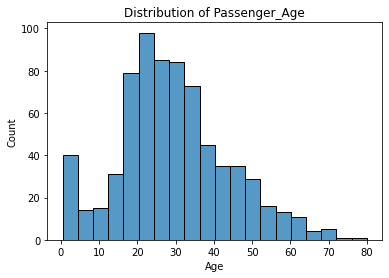

In [8]:
#checking the distribution of 'Age' column

sns.histplot(df['Age'])
plt.title('Distribution of Passenger_Age')
plt.show()

since the distribution is slightly right skewed, we fill the missing values with median age.

In [9]:
#filling age null with median age

df['Age'] = df['Age'].fillna(df['Age'].median())

As 'Cabin' column have 687 null values outof 891 entries, we may drop the column.

In [10]:
#droping 'Cabin' column

df.drop('Cabin', axis=1, inplace=True)

In [11]:
#filling null vales in 'Cabin' and 'Embarked' with more frequent value

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
#again checking for count of null values

df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

### Checking outliers in Fare

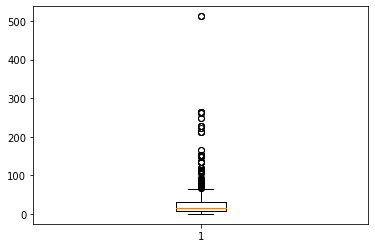

In [13]:
#checking for outliers in age column using boxplot

plt.boxplot(x=df['Fare'])
plt.show()

In [15]:
#finding outlier in Fare

Q1=np.percentile(df['Fare'], 25, interpolation='midpoint')
Q2=np.percentile(df['Fare'], 50, interpolation='midpoint')
Q3=np.percentile(df['Fare'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('Q1 : ',Q1,'\n'
     'Q2 : ',Q2,'\n'
     'Q3 : ',Q3)
print('IQR : ',IQR)
print('lower-limit : ',low_limit)
print('upper-limit : ',up_limit)

#finding outlier
outlier=[]
for x in df['Fare']:
    if ((x<low_limit) or (x>up_limit)):
        outlier.append(x)
print('Count of outlier values: ',len(outlier))

Q1 :  7.9104 
Q2 :  14.4542 
Q3 :  31.0
IQR :  23.0896
lower-limit :  -26.724
upper-limit :  65.6344
Count of outlier values:  116


In [16]:
# trimming outliers in Fare
df1 = df[df['Fare']<up_limit]

In [17]:
df1.shape #shows shape of trimmed dataset

(775, 10)

116 outlier values have been trimmed out

### Checking outliers in Age

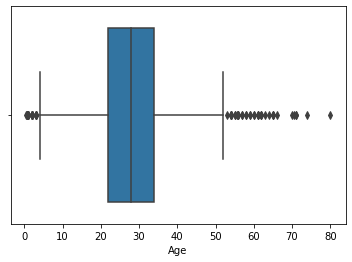

In [18]:
sns.boxplot(x=df1['Age'])
plt.show()

In [19]:
#finding outlier in Age

Q1=np.percentile(df1['Age'], 25, interpolation='midpoint')
Q2=np.percentile(df1['Age'], 50, interpolation='midpoint')
Q3=np.percentile(df1['Age'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('Q1 : ',Q1,'\n'
     'Q2 : ',Q2,'\n'
     'Q3 : ',Q3)
print('IQR : ',IQR)
print('lower-limit : ',low_limit)
print('upper-limit : ',up_limit)

#finding outlier
outlier=[]
for x in df1['Age']:
    if ((x<low_limit) or (x>up_limit)):
        outlier.append(x)
print('Count of outlier values: ',len(outlier))

Q1 :  22.0 
Q2 :  28.0 
Q3 :  34.0
IQR :  12.0
lower-limit :  4.0
upper-limit :  52.0
Count of outlier values:  67


In [20]:
#trimming and eliminating outliers
df2 = df1[(df1['Age']<up_limit) & (df1['Age']>low_limit)]

### Checking outliers in Parch

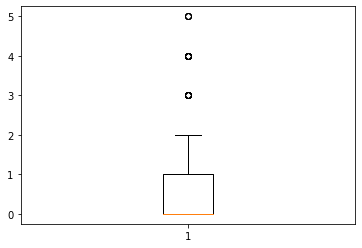

In [21]:
plt.boxplot(x=df2['SibSp'])
plt.show()

In [22]:
#finding outlier in Age

Q1=np.percentile(df2['SibSp'], 25, interpolation='midpoint')
Q2=np.percentile(df2['SibSp'], 50, interpolation='midpoint')
Q3=np.percentile(df2['SibSp'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('Q1 : ',Q1,'\n'
     'Q2 : ',Q2,'\n'
     'Q3 : ',Q3)
print('IQR : ',IQR)
print('lower-limit : ',low_limit)
print('upper-limit : ',up_limit)

#finding outlier
outlier=[]
for x in df2['SibSp']:
    if ((x<low_limit) or (x>up_limit)):
        outlier.append(x)
print('Count of outlier values: ',len(outlier))

Q1 :  0.0 
Q2 :  0.0 
Q3 :  1.0
IQR :  1.0
lower-limit :  -1.5
upper-limit :  2.5
Count of outlier values:  24


In [23]:
# droping outlier values 
ind2=df2['SibSp']>up_limit
index=df2.loc[ind2].index
df2=df2.drop(index)

In [24]:
df2.shape

(672, 10)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [25]:
df2['Survived'].describe()

count    672.000000
mean       0.333333
std        0.471756
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

The Min and Max of target column 'Survived' is already 0 and 1 respectively. 

In [26]:
type(df2['Survived'])

pandas.core.series.Series

####  Applying MinMax Scaler and checking for any changes in the description :

In [27]:
arr=np.array(df2['Survived']).reshape(-1, 1)
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaled_Survived=pd.DataFrame(scaler.fit_transform(arr),
                             columns=['Survived'],
                             index=df2.index)
scaled_Survived

,Survived
PassengerId,
1,0.0
3,1.0
4,1.0
5,0.0
6,0.0
...,...
887,0.0
888,1.0
889,0.0


In [28]:
df2['Survived'].describe()

count    672.000000
mean       0.333333
std        0.471756
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

No changes in the description of 'Survived' column even after MinMax scaling. The column is already scaled.